In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [102]:
def plot_gallery(images,labels,classes):
  # Affiche les 12 premières images contenues dans images
  # images est de taille Nb image*Ny*Nx
  plt.figure(figsize=(7.2, 7.2))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
  for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap=plt.cm.gray)
    plt.title(classes[labels[i]])
    plt.xticks(())
    plt.yticks(())
  plt.show() 

In [103]:
[X, y, name]=np.load("TP1.npy",allow_pickle=True )


X représente les features, y les labels et name le nom des classes

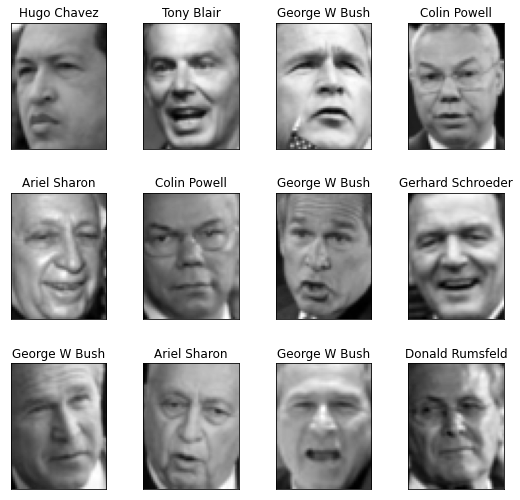

In [104]:
plot_gallery(X,y,name)

In [105]:

#La taille de l'image
tailleImage = X[0].shape; 
print(f'La taille de l\'image est : {tailleImage}')

#Le nombre d'images
nbImages = len(X)
print(f'Le nombre d\'images : {nbImages}')

#Le nombre de classes
nbClasses = len(name)
print(f'Le nombre de classes = {nbClasses} : {name}')

La taille de l'image est : (62, 47)
Le nombre d'images : 1288
Le nombre de classes = 7 : ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


Text(0, 0.5, 'count')

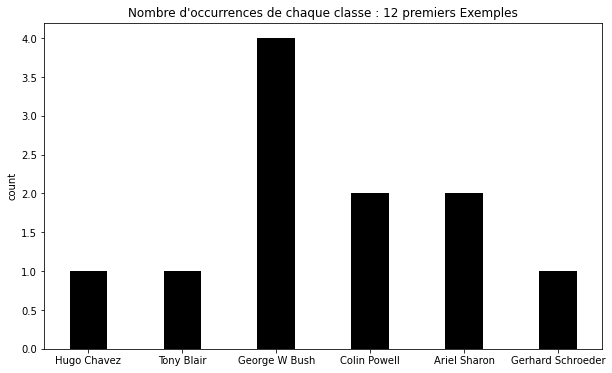

In [106]:
plt.figure(figsize=(10, 6)) 
plt.hist(name[y[0 : 11]].flatten(), bins=range(7),align ='left', rwidth=0.4,color='k')
plt.title('Nombre d\'occurrences de chaque classe : 12 premiers Exemples')
#plt.xlabel('classes')
plt.ylabel('count')
#plt.grid()

Nous remarquons que les classes ne sont pas equiprobables.


Text(0, 0.5, 'count')

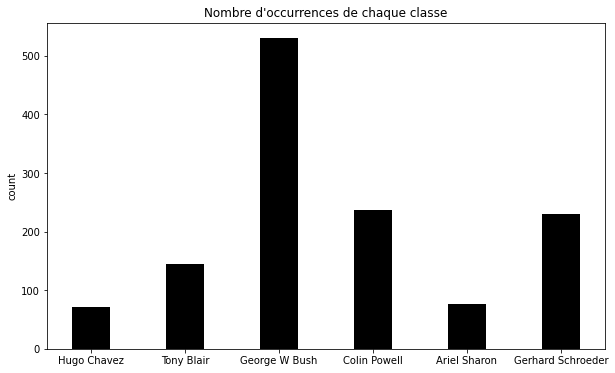

In [107]:
plt.figure(figsize=(10, 6)) 
plt.hist(name[y[0 : nbImages]].flatten(), bins=range(7),align ='left', rwidth=0.4,color='k')
plt.title('Nombre d\'occurrences de chaque classe')
plt.ylabel('count')

In [108]:
for i,classe in enumerate(name):
  labelsList = list(y)
  nbExemples = labelsList.count(i)
  print(f'Le nombre d\'exemple dans la class < {classe} >  = {nbExemples}')

Le nombre d'exemple dans la class < Ariel Sharon >  = 77
Le nombre d'exemple dans la class < Colin Powell >  = 236
Le nombre d'exemple dans la class < Donald Rumsfeld >  = 121
Le nombre d'exemple dans la class < George W Bush >  = 530
Le nombre d'exemple dans la class < Gerhard Schroeder >  = 109
Le nombre d'exemple dans la class < Hugo Chavez >  = 71
Le nombre d'exemple dans la class < Tony Blair >  = 144



**Partitionnement de la base d’apprentissage** : 
Partitionner la base en une base d’apprentissage et une base de test en mettant 25% des données en test (fonction train_test_split()) pour obtenir les variables X_train, X_test, y_train et y_test

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

# Combien y a-t-il d’images en train et en test ?
print(f'Le nombre d\'images pour l\'apprentissage : {len(X_train)}')
print(f'Le nombre d\'images pour le test : {len(X_test)}')


Le nombre d'images pour l'apprentissage : 966
Le nombre d'images pour le test : 322


## **II. Prétraitement des données** 

---



**Redimensionnement des données** : Pour réaliser une classification par kppv, on utilise un codage rétinien. Chaque image est donc
représentée par un vecteur de dimension 2914. Redimensionner X_train et X_test de façon à ce
qu’ils aient pour dimension Nb_exemple x 2914

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

print(f'Dimensionnement de X_train avant le redimensionnment : {np.shape(X_train)}')
print(f'Dimensionnement de X_test  avant le redimensionnment : {np.shape(X_test)}')

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1]*X_test.shape[2]))

print(f'\nDimensionnement de X_train après le redimensionnment : {np.shape(X_train)}')
print(f'Dimensionnement de X_test  après le redimensionnment : {np.shape(X_test)}')


Dimensionnement de X_train avant le redimensionnment : (966, 62, 47)
Dimensionnement de X_test  avant le redimensionnment : (322, 62, 47)

Dimensionnement de X_train après le redimensionnment : (966, 2914)
Dimensionnement de X_test  après le redimensionnment : (322, 2914)


**Mise en forme des données pour la classification**  : Mettre en forme les données (train et test) en utilisant la fonction classe StandardScaler

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn

Standardize features by removing the mean and scaling to unit variance.
The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

StandardScaler() : Technique de mise à l'échelle 

    $(xi - mean(x))/stdev(x)$

mean(x) : Moyenne

stdev(x) : « Standard Deviation »


In [111]:
scaler = StandardScaler();
#print(X_train[0])

# Calcul de la moyenne et de l'ecart type
scaler.fit(X_train)
#print(scaler.mean_)

# Normalisation des données par rapport à X_Train
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scaled data has zero mean and unit variance:
print("X_train_scaled.mean(axis=0) = ",X_train_scaled.mean(axis=0))
print("X_train_scaled.std(axis=0) = ", X_train_scaled.std(axis=0))

print("\nX_test_scaled.mean(axis=0) = ",X_test_scaled.mean(axis=0))
print("X_test_scaled.std(axis=0) = ", X_test_scaled.std(axis=0))

X_train_scaled.mean(axis=0) =  [ 1.1476671e-08  1.0119215e-08 -1.5919253e-08 ...  1.0983051e-08
 -1.4438392e-08  1.4808608e-09]
X_train_scaled.std(axis=0) =  [1.0000002  0.9999998  0.99999964 ... 1.0000001  0.99999946 0.99999964]

X_test_scaled.mean(axis=0) =  [-0.0276855  -0.03340848 -0.03209007 ... -0.03164582 -0.04579046
 -0.0620914 ]
X_test_scaled.std(axis=0) =  [1.0024064  0.97700125 0.977229   ... 0.9521843  0.934255   0.940244  ]


## **III. Classification par lesKPPV**


---
###**Classifieur 1PPV** :
Définir le classifieur 1PPV en utilisant la classe KNeighborsClassifier(). On souhaite utiliser la
distance euclidienne et le 1PPV.

*sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)*

Classifier implementing the k-nearest neighbors vote.


*p : int, default=2
Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.*

In [118]:
X_train = X_train_scaled
X_test = X_test_scaled 

classifier = KNeighborsClassifier(n_neighbors=1,p=2)
classifier.fit(X_train,y_train)

# Réaliser la classification des exemples de test en utilisant la méthode predict()
y_pred = classifier.predict(X_test)

# Afficher la matrice de confusion : Compute confusion matrix to evaluate the accuracy of a classification.
C = confusion_matrix(y_test,y_pred)

"""y_test : array-like of shape (n_samples,)
Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,)
Estimated targets as returned by a classifier."""

print(C)

# La somme des éléments de la diagonale divisée par la somme des éléments
print("\nTaux de reconnaissance ",np.sum(np.diag(C))/np.sum(C)*100)

[[  5   1   0   4   2   1   0]
 [  2  31   4  12   4   3   4]
 [  3   5  15   4   0   0   0]
 [  2   5   9 102   6   7  15]
 [  1   2   3   5   9   1   4]
 [  0   1   0   4   2   8   0]
 [  1   3   2  10   2   2  16]]

Taux de reconnaissance  57.7639751552795


**Que représente la matrice de confusion ?** 

*La matrice de confusion est en quelque sorte un résumé des résultats de prédiction pour un problème particulier de classification. Elle compare les données réelles pour une variable cible à celles prédites par un modèle.*

**Que vaut sa somme ?** 
*La somme de la matrice represente le nombre d’exemples de la base de test*


**Est-ce que les classes sont équilibrées ?**

*Non, les classes ne sont pas équilibrées*


### **Classifieur KPPV** : 
Faire varier le K des KPPV et tracer l’évolution du taux de reconnaissance

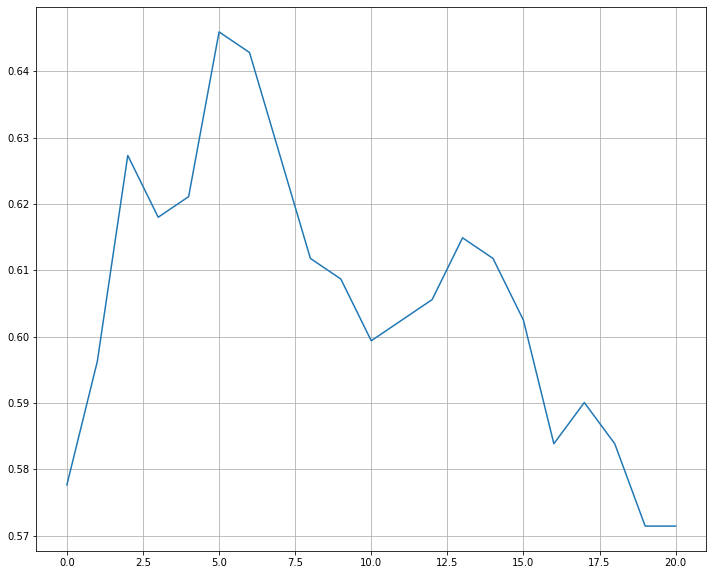

In [120]:
C2 = []
Taux2 = []
itt =0
for i in range (1,50,2):
  if i % len(name) == 0 :
    continue;
  classifier2 = KNeighborsClassifier(n_neighbors=i,p=2)
  classifier2.fit(X_train,y_train)
  y_pred2 = classifier2.predict(X_test)
  
  C2tmp = confusion_matrix(y_test,y_pred2)
  C2.append(C2tmp)
  Taux2tmp = np.sum(np.diag(C2tmp))/np.sum(C2tmp)

  Taux2.append(Taux2tmp)
  itt +=1

plt.figure(figsize=(12, 10))
t = np.arange(itt) 

plt.plot(t,Taux2)
plt.grid()
plt.show()

###**Classifieur KPPV et distance de Manhattan** :

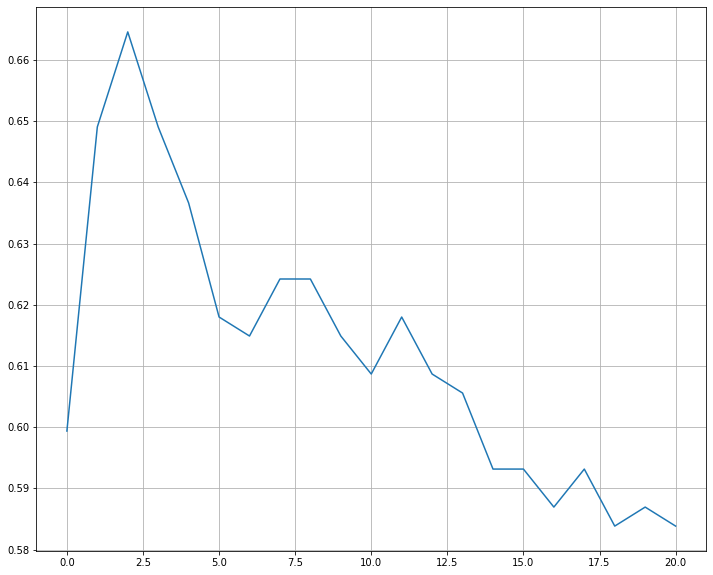

In [121]:
"""Avec la distance de Manhattan"""

C3 = []
Taux3 = []
itt3 =0
for i in range (1,50,2):
  if i % len(name) == 0 :
    continue;
  classifier3 = KNeighborsClassifier(n_neighbors=i,p=1)
  classifier3.fit(X_train,y_train)
  y_pred3 = classifier3.predict(X_test)
  
  C3tmp = confusion_matrix(y_test,y_pred3)
  C3.append(C3tmp)
  Taux3tmp = np.sum(np.diag(C3tmp))/np.sum(C3tmp)

  Taux3.append(Taux3tmp)
  itt3 +=1

plt.figure(figsize=(12, 10))
t = np.arange(itt3) 

plt.plot(t,Taux3)
plt.grid()
plt.show()